Exploratory Data Analysis (EDA)

          Density     BodyFat         Age      Weight      Height        Neck  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   19.150794   44.884921  178.924405   70.148810   37.992063   
std      0.019031    8.368740   12.602040   29.389160    3.662856    2.430913   
min      0.995000    0.000000   22.000000  118.500000   29.500000   31.100000   
25%      1.041400   12.475000   35.750000  159.000000   68.250000   36.400000   
50%      1.054900   19.200000   43.000000  176.500000   70.000000   38.000000   
75%      1.070400   25.300000   54.000000  197.000000   72.250000   39.425000   
max      1.108900   47.500000   81.000000  363.150000   77.750000   51.200000   

            Chest     Abdomen         Hip       Thigh        Knee       Ankle  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   100.824206   92.555952   99.904762   59.405952   38.590476   23.102381   
std      8.430476   10.7830

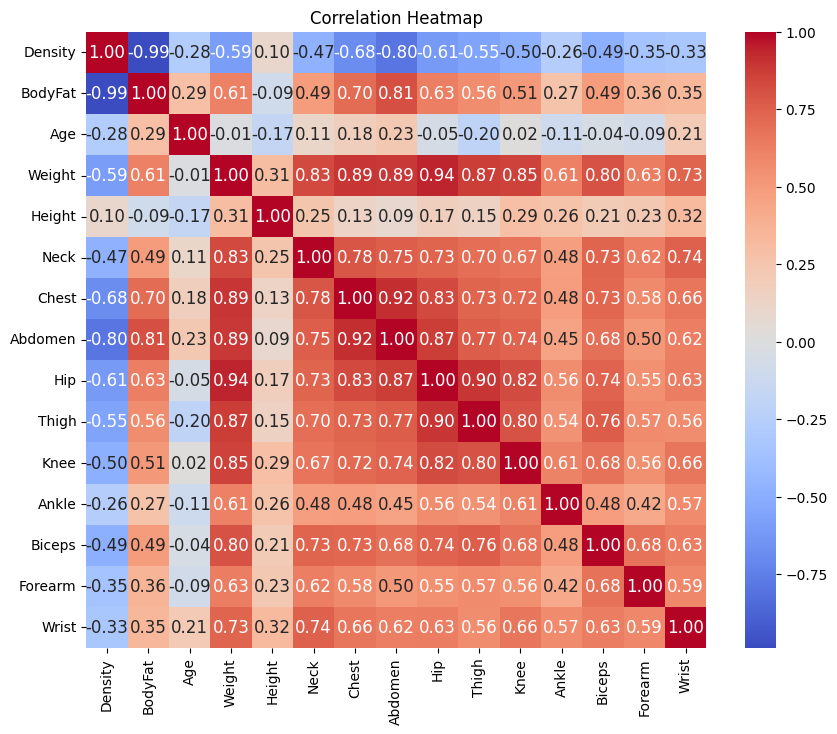

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/DataSets for Panda/bodyfat.csv')

# 1. Statistical summary of the dataset
print(data.describe())

# 2. Correlation heatmap
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 12})
plt.title("Correlation Heatmap")
plt.show()

# Prepare the data (split into features and target)
X = data.drop('BodyFat', axis=1).values
y = data['BodyFat'].values

# Check for NaN values in the data
if np.any(np.isnan(X)) or np.any(np.isnan(y)):
    print("Data contains NaN values!")

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add intercept term (bias term)
X = np.c_[np.ones(X.shape[0]), X]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 Build Linear Regression from Scratch

In [ ]:
# Train the model using Linear Regression from scratch
def linear_regression(X, y, learning_rate=0.01, iterations=1000):
    m = len(y)
    theta = np.zeros(X.shape[1])  # Initialize the parameters (theta)
    for _ in range(iterations):
        predictions = X.dot(theta)  # Make predictions
        error = predictions - y  # Calculate the error
        gradient = (1/m) * X.T.dot(error)  # Compute the gradient
        theta -= learning_rate * gradient  # Update the parameters
    return theta

# Train the model on training data
theta = linear_regression(X_train, y_train, learning_rate=0.0001, iterations=1000)

# Print the model parameters (theta)
print("Model parameters (theta):", theta)


Model parameters (theta): [ 1.85013134 -0.79142873  0.31741911  0.31182009 -0.15798606  0.26672481
  0.41220012  0.55123041  0.35210358  0.26693556  0.26845733  0.03721306
  0.17717112  0.22383646  0.16647212]


Build Two Models for Regression using Scikit-learn

Model 1: Linear Regression (Simple Model)

In [ ]:
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()
model_1.fit(X_train, y_train)


LinearRegression()

Model 2: Random Forest Regressor (Complex Model)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_2 = RandomForestRegressor()
model_2.fit(X_train, y_train)


RandomForestRegressor()

Use R-squared and MSE to compare which model performs better

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)

print("Model 1 MSE:", mean_squared_error(y_test, y_pred_1))
print("Model 2 MSE:", mean_squared_error(y_test, y_pred_2))


Model 1 MSE: 0.38031220947728755
Model 2 MSE: 0.09095280392156994


Hyperparameter Optimization with Cross-Validation

For Model 1 (Linear Regression):

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid_1 = {'alpha': [0.1, 1, 10, 100]}
grid_search_1 = GridSearchCV(Ridge(), param_grid_1, cv=5)
grid_search_1.fit(X_train, y_train)
print("Best hyperparameters for Model 1:", grid_search_1.best_params_)


Best hyperparameters for Model 1: {'alpha': 1}


For Model 2 (Random Forest Regressor):

In [ ]:
param_grid_2 = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, 30]}
grid_search_2 = GridSearchCV(RandomForestRegressor(), param_grid_2, cv=5)
grid_search_2.fit(X_train, y_train)
print("Best hyperparameters for Model 2:", grid_search_2.best_params_)


Best hyperparameters for Model 2: {'max_depth': 20, 'n_estimators': 50}


Feature Selection

For Model 1 (Linear Regression):
Use Correlation to select features highly correlated with the target.
Alternatively, use Recursive Feature Elimination (RFE).

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

selector_1 = RFE(LinearRegression(), n_features_to_select=5)
selector_1 = selector_1.fit(X_train, y_train)
selected_features_1 = selector_1.support_
print("Best features for Model 1:", selected_features_1)


Best features for Model 1: [False  True  True  True False False False  True False False False  True
 False False False]


For Model 2 (Random Forest):
Random Forest provides feature importances.

In [ ]:
feature_importances_2 = model_2.feature_importances_
important_features_2 = np.argsort(feature_importances_2)[-5:]  # Top 5 features
print("Best features for Model 2:", important_features_2)


Best features for Model 2: [ 6 10  7  4  1]


 Build the Final Model

In [ ]:
from sklearn.linear_model import Ridge

# Assuming you have the selected features from RFE
important_features_1 = np.where(selected_features_1)[0]  # Get the indices of selected features

# Example for Model 1 with best hyperparameters and selected features
final_model = Ridge(alpha=grid_search_1.best_params_['alpha'])
final_model.fit(X_train[:, important_features_1], y_train)

# print the model's coefficients to check how well it performed
print("Model coefficients:", final_model.coef_)

Model coefficients: [-7.5487861   0.23619116  0.35153944  0.55554576 -0.20195255]


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


# Using the best alpha from grid search
best_alpha = grid_search_1.best_params_['alpha']

# Get the important features from feature selection
important_features_1 = np.where(selected_features_1)[0]

# Rebuild the model using the best hyperparameters and selected features
final_model = Ridge(alpha=best_alpha)
final_model.fit(X_train[:, important_features_1], y_train)

# Predict on the test set
y_pred = final_model.predict(X_test[:, important_features_1])

# Evaluate the performance of the final model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Final Model Performance:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")


Final Model Performance:
Mean Squared Error (MSE): 0.42843046935641427
R-squared: 0.9907900205317143


Evaluate All Models on Train & Test Sets

Model 1 - Train MSE: 1.8510, Test MSE: 0.3803
Model 1 - Train R²: 0.9754, Test R²: 0.9918
Model 2 - Train MSE: 0.3204, Test MSE: 0.0910
Model 2 - Train R²: 0.9957, Test R²: 0.9980
Final Model - Train MSE: 1.8736, Test MSE: 0.4284
Final Model - Train R²: 0.9751, Test R²: 0.9908


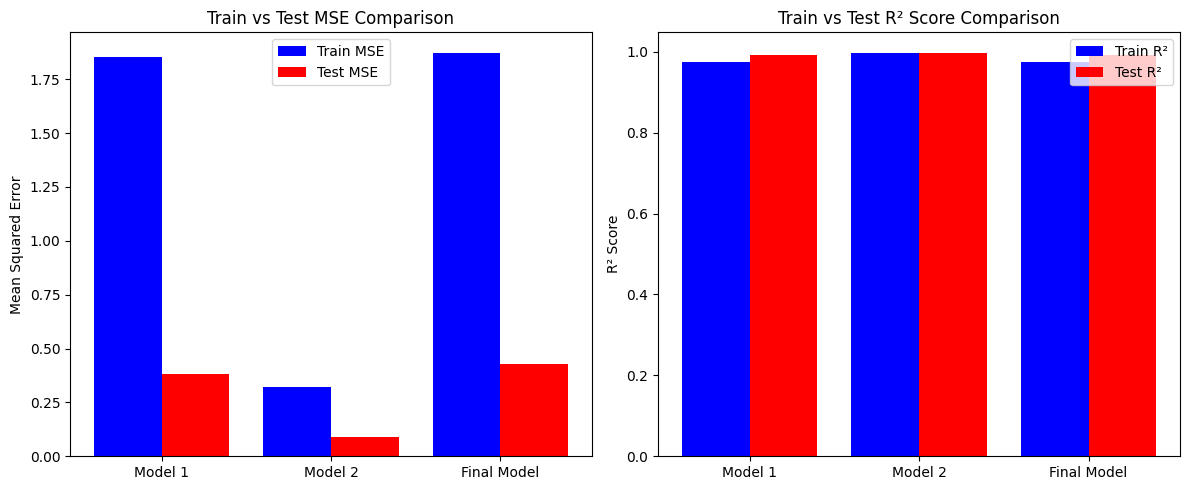

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Function to evaluate the model
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"{model_name} - Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
    print(f"{model_name} - Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")

    return train_mse, test_mse, train_r2, test_r2

# Evaluate Model 1
train_mse_1, test_mse_1, train_r2_1, test_r2_1 = evaluate_model(model_1, X_train, y_train, X_test, y_test, "Model 1")

# Evaluate Model 2
train_mse_2, test_mse_2, train_r2_2, test_r2_2 = evaluate_model(model_2, X_train, y_train, X_test, y_test, "Model 2")

# Evaluate Final Model
train_mse_final, test_mse_final, train_r2_final, test_r2_final = evaluate_model(final_model, X_train[:, important_features_1], y_train, X_test[:, important_features_1], y_test, "Final Model")

# Visualization - Bar Graph for MSE and R² Scores
models = ['Model 1', 'Model 2', 'Final Model']
train_mse_values = [train_mse_1, train_mse_2, train_mse_final]
test_mse_values = [test_mse_1, test_mse_2, test_mse_final]

train_r2_values = [train_r2_1, train_r2_2, train_r2_final]
test_r2_values = [test_r2_1, test_r2_2, test_r2_final]

x = np.arange(len(models))

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# MSE Plot
axs[0].bar(x - 0.2, train_mse_values, 0.4, label='Train MSE', color='blue')
axs[0].bar(x + 0.2, test_mse_values, 0.4, label='Test MSE', color='red')
axs[0].set_xticks(x)
axs[0].set_xticklabels(models)
axs[0].set_ylabel("Mean Squared Error")
axs[0].set_title("Train vs Test MSE Comparison")
axs[0].legend()

# R² Plot
axs[1].bar(x - 0.2, train_r2_values, 0.4, label='Train R²', color='blue')
axs[1].bar(x + 0.2, test_r2_values, 0.4, label='Test R²', color='red')
axs[1].set_xticks(x)
axs[1].set_xticklabels(models)
axs[1].set_ylabel("R² Score")
axs[1].set_title("Train vs Test R² Score Comparison")
axs[1].legend()
wha
plt.tight_layout()
plt.show()


MSE (Mean Squared Error) → Lower is better.
R² Score → Higher is better